In [1]:
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [2]:
#Ver con glob para carpeta local
df0= pd.read_csv('DEN_2015.csv', sep=';')
df1= pd.read_csv('DEN_2016.csv', sep=';')
df2= pd.read_csv('DEN_2017.csv', sep=';')
df3= pd.read_csv('DEN_2018.csv', sep=';')
df4= pd.read_csv('DEN_2019.csv', sep=';')
df5= pd.read_csv('DEN_2020.csv', sep=';')
DF_TOTAL=[df0, df1, df2, df3, df4, df5]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
for df in DF_TOTAL:
    #Cantidad de Departamentos, Distritos y Provincias
    df["Dep-Prov-Distrito"] = df["Departamento"] + ", " + df["Provincia"] + ", " + df["Distrito"]
    df["Dep-Prov"] = df["Departamento"] + ", " + df["Provincia"]
    print("La cantidad de departamentos es:", df['Departamento'].nunique())
    print("La cantidad de distritos es:", df['Dep-Prov-Distrito'].nunique())
    print("La cantidad de provincias es:", df['Dep-Prov'].nunique())
    print('----------------')

La cantidad de departamentos es: 18
La cantidad de distritos es: 230
La cantidad de provincias es: 65
----------------
La cantidad de departamentos es: 18
La cantidad de distritos es: 249
La cantidad de provincias es: 66
----------------
La cantidad de departamentos es: 19
La cantidad de distritos es: 329
La cantidad de provincias es: 74
----------------
La cantidad de departamentos es: 19
La cantidad de distritos es: 179
La cantidad de provincias es: 62
----------------
La cantidad de departamentos es: 19
La cantidad de distritos es: 246
La cantidad de provincias es: 72
----------------
La cantidad de departamentos es: 20
La cantidad de distritos es: 376
La cantidad de provincias es: 89
----------------


In [4]:
DF_TOTAL_T = pd.concat(DF_TOTAL, axis=0, ignore_index=True)

In [5]:
DF_TOTAL_T = DF_TOTAL_T[['Dep-Prov-Distrito', 'Distrito', 'Semana', 'Incidencia semanal','Casos', 'Año']] 
DF_TOTAL_T['Incidencia semanal']= df['Incidencia semanal'].str.replace(',', '.').astype(float)
DF_TOTAL_T['Semana'] = DF_TOTAL_T['Semana'] + DF_TOTAL_T['Año'].apply(lambda x: (x-2015)*53 if x>2015 else 0)
DF_TOTAL_T = DF_TOTAL_T[DF_TOTAL_T['Incidencia semanal'].notna()]

In [6]:
len(np.unique(DF_TOTAL_T['Dep-Prov-Distrito'].values))

276

In [7]:
np.unique(DF_TOTAL_T['Semana'].values)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106], dtype=int64)

In [8]:
DF_TOTAL_T.to_csv('DEN_2015to2020SinNAN.csv', index = False)

In [9]:
listaDistrito = DF_TOTAL_T['Dep-Prov-Distrito'].tolist()
listaDistrito = list(dict.fromkeys(listaDistrito))
print('Son ', len(listaDistrito), ' distritos')
listaDistrito.sort()
print(listaDistrito)

Son  276  distritos
['AMAZONAS, BAGUA, ARAMANGO', 'AMAZONAS, BAGUA, BAGUA', 'AMAZONAS, BAGUA, IMAZA', 'AMAZONAS, CHACHAPOYAS, CHACHAPOYAS', 'AMAZONAS, CONDORCANQUI, NIEVA', 'AMAZONAS, CONDORCANQUI, RIO SANTIAGO', 'AMAZONAS, UTCUBAMBA, BAGUA GRANDE', 'AMAZONAS, UTCUBAMBA, CAJARURO', 'ANCASH, CASMA, CASMA', 'ANCASH, HUARMEY, HUARMEY', 'ANCASH, SANTA, CHIMBOTE', 'ANCASH, SANTA, NUEVO CHIMBOTE', 'AYACUCHO, HUAMANGA, AYACUCHO', 'AYACUCHO, HUANTA, CANAYRE', 'AYACUCHO, HUANTA, LLOCHEGUA', 'AYACUCHO, HUANTA, SIVIA', 'AYACUCHO, LA MAR, ANCHIHUAY', 'AYACUCHO, LA MAR, ANCO', 'AYACUCHO, LA MAR, AYNA', 'AYACUCHO, LA MAR, SANTA ROSA', 'CAJAMARCA, CAJAMARCA, CAJAMARCA', 'CAJAMARCA, CONTUMAZA, CHILETE', 'CAJAMARCA, CONTUMAZA, TANTARICA', 'CAJAMARCA, JAEN, BELLAVISTA', 'CAJAMARCA, JAEN, JAEN', 'CAJAMARCA, JAEN, PUCARA', 'CAJAMARCA, JAEN, SAN JOSE DEL ALTO', 'CAJAMARCA, SAN IGNACIO, CHIRINOS', 'CAJAMARCA, SAN IGNACIO, HUARANGO', 'CAJAMARCA, SAN IGNACIO, NAMBALLE', 'CAJAMARCA, SAN IGNACIO, SAN IGNACIO', 

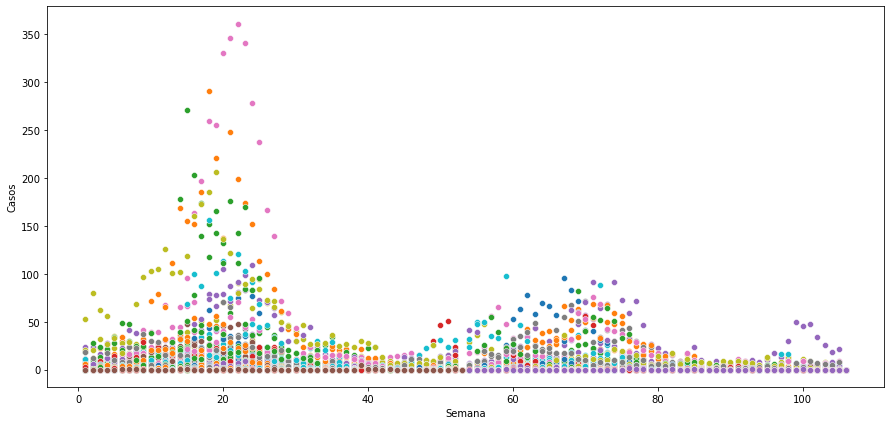

In [10]:
timeSeries = pd.DataFrame()
timeSeries_Casos = pd.DataFrame()
plt.figure(figsize=[15,7])
for dis in listaDistrito:
    distrito=DF_TOTAL_T[DF_TOTAL_T['Dep-Prov-Distrito']==dis]
    distrito.sort_values(['Semana'], ascending = True)    
    distrito = distrito.reset_index(drop=True)
    timeSeries = timeSeries.append(distrito['Incidencia semanal'])
    timeSeries_Casos = timeSeries_Casos.append(distrito['Casos'])
    #timeSeriesNorm = timeSeriesNorm.append(pd.Series(normalizado.flatten()), ignore_index=True)
    #print(dis)
    ax = sns.scatterplot(y=distrito['Casos'], x= distrito['Semana'])
plt.show()

In [11]:
#timeSeriesNorm.to_csv('SerieTemporalNorm_2015to2020.csv', index = False)
timeSeries.to_csv('SerieTemporal_2015to2020SinNan.csv', index = False)